# Explore Dataset

## Setup

In [ ]:
import pandas as pd
import seaborn as sns

In [111]:
sns.set_theme()

## Read Data

In [112]:
df_jobs = pd.read_csv('data/jobs.csv')

In [113]:
df_jobs

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,NaN,17.0,...,BASE_SALARY,38480.0,8540.0,With years of experience helping local buyers ...,NJ,US,Jersey City,07302,Real Estate,402.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,NaN,30.0,...,BASE_SALARY,83200.0,80521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,NaN,45000.0,...,BASE_SALARY,55000.0,45202.0,"In April of 1983, The National Exemplar began ...",Ohio,US,Mariemont,45227,Restaurants,15.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,NaN,140000.0,...,BASE_SALARY,157500.0,11040.0,"Abrams Fensterman, LLP is a full-service law f...",New York,US,Lake Success,11042,Law Practice,222.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,NaN,60000.0,...,BASE_SALARY,70000.0,52601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,NaN,120000.0,...,BASE_SALARY,157500.0,94595.0,"For more than 30 years, Lozano Smith has serve...",California,US,Fresno,93720,Law Practice,185.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,NaN,NaN,...,NaN,NaN,NaN,Pinterest's mission is to bring everyone the i...,California,US,San Francisco,0,Software Development,8667.0
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,NaN,NaN,...,NaN,NaN,99201.0,EPS Learning has partnered with educators for ...,MD,US,Bethesda,20814,Education Administration Programs,127.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,NaN,NaN,...,NaN,NaN,NaN,Trelleborg Applied Technologies manufactures a...,Lancashire,GB,Rochdale,OL11 1TQ,Industrial Machinery Manufacturing,47.0


## Get Overview of Jobs Data

**Columns with description from Kaggle**

- job_id: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/(job_id))
- company_id: Identifier for the company associated with the job posting (maps to companies.csv)
- title: Job title.
- description: Job description.
- max_salary: Maximum salary
- med_salary: Median salary
- min_salary: Minimum salary
- pay_period: Pay period for salary (Hourly, Monthly, Yearly)
- formatted_work_type: Type of work (Fulltime, Parttime, Contract)
- location: Job location
- original_listed_time: Original time the job was listed
- remote_allowed: Whether job permits remote work
- job_posting_url: URL to the job posting on a platform
- formatted_experience_level: Job experience level (entry, associate, executive, etc)
- skills_desc: Description detailing required skills for job
- listed_time: Time when the job was listed
- sponsored: Whether the job listing is sponsored or promoted.
- work_type: Type of work associated with the job
- currency: Currency in which the salary is provided.
- compensation_type: Type of compensation for the job.

In [114]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   med_salary                  6280 non-null    float64
 9   min_salary                  29793 non-null   float64
 10  formatted_work_type         123849 non-null  object 
 11  original_listed_time        123849 non-null  float64
 12  remote_allowed              15246 non-null   float64
 13  formatted_expe

In [115]:
'''
See example rows.
'''
NUM_ROWS=5
with pd.option_context('display.max_columns', None):
    display(df_jobs.sample(NUM_ROWS, random_state=42))

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,formatted_work_type,original_listed_time,remote_allowed,formatted_experience_level,skills_desc,listed_time,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
73989,3902944011,Current Power,Senior Automation Engineer - Power Systems,The Senior Automation / Power Systems Engineer...,NaN,NaN,"Houston, TX",760913.0,NaN,NaN,Full-time,1.713280e+12,NaN,Mid-Senior level,NaN,1.713280e+12,0,FULL_TIME,NaN,NaN,NaN,77002.0,Current Power is an International supplier of ...,TX,US,Houston,77066,Oil and Gas,29.0
59308,3901960222,DISH Network,DISH Installation Technician - Field,"Company Summary\n\nDISH, an EchoStar Company, ...",19.75,HOURLY,"Orange, TX",4296.0,NaN,19.75,Full-time,1.713477e+12,NaN,NaN,NaN,1.713478e+12,0,FULL_TIME,USD,BASE_SALARY,41080.0,77630.0,Our adventure began by changing the way people...,CO,US,Englewood,80112,Telecommunications,22988.0
44663,3900944095,"Coca-Cola Bottling Company UNITED, Inc.",Order Builder,Division: North Alabama\n\nDepartment : Oxford...,NaN,NaN,"Oxford, AL",136791.0,NaN,NaN,Full-time,1.713388e+12,NaN,Entry level,NaN,1.713389e+12,0,FULL_TIME,NaN,NaN,NaN,36203.0,Coca-Cola Bottling Company UNITED was founded ...,AL - Alabama,US,Birmingham,35217,Manufacturing,5672.0
81954,3903878594,Denver7 (KMGH-TV),"Mountain Multimedia Journalist, KMGH","KMGH, the E.W. Scripps Company ABC affiliate i...",NaN,NaN,"Denver, CO",11500365.0,NaN,NaN,Full-time,1.713496e+12,NaN,Entry level,NaN,1.713496e+12,0,FULL_TIME,NaN,NaN,NaN,80202.0,Founded in 1953 and acquired by the E.W. Scrip...,Colorado,US,Denver,0,Broadcast Media Production and Distribution,121.0
113151,3905670593,BAYADA Home Health Care,Licensed Practical Nurse (LPN),"Come for the Flexibility, Stay for the Culture...",35.00,HOURLY,"Teterboro, NJ",19472.0,NaN,30.00,Full-time,1.713398e+12,NaN,Entry level,NaN,1.713521e+12,0,FULL_TIME,USD,BASE_SALARY,67600.0,7608.0,BAYADA Home Health Care was founded by J. Mark...,New Jersey,US,Pennsauken Township,0,Hospitals and Health Care,13841.0


In [116]:
'''
Understand missing (null) data.

~36K (~29%) have non-null normalized_salary, compensation type, pay period.
~29K (~24%) have non-null min and max salary.
~6.2K (~5%) have non-null median salary.
Only ~2.4K (2%) have non-null skill_desc.
~94K (76%) have non-null formatted_experience_level
Job title, location and work type have 100% coverage.
Job description has almost 100% coverage.
Company name, company description, company employee count, company city/state, company industries seem to have close to 100% coverage.
'''
pd.concat([df_jobs.notna().sum(), df_jobs.notna().mean()*100], keys=['non_nulls', '%'], axis=1)

,non_nulls,%
job_id,123849,100.000000
company_name,122130,98.612019
title,123849,100.000000
description,123842,99.994348
max_salary,29793,24.055907
pay_period,36073,29.126598
location,123849,100.000000
company_id,122132,98.613634
med_salary,6280,5.070691
min_salary,29793,24.055907


In [117]:
'''
No duplicated jobs based on job ID.
'''
ID_COLS=['job_id']
df_jobs[df_jobs.duplicated(subset=ID_COLS)]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count


## Job Title in Jobs Data

In [118]:
'''
Some job titles seemed normalized; some not so much. Seems to be a wide spread of raw job titles.
'''
counts = df_jobs['title'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
title,,
Sales Manager,673,0.543404
Customer Service Representative,373,0.301173
Project Manager,354,0.285832
Administrative Assistant,254,0.205088
Senior Accountant,238,0.192169
...,...,...
Cath Lab / IR Technologist (Cert) - Cardiac Cath,1,0.000807
Energy Administrative Assistant Part Time,1,0.000807
ASSOCIATE CLIENT SUCCESS MANAGER,1,0.000807


## Job Location in Jobs Data

In [119]:
'''
~6.56% jobs have no city, state level data. Otherwise, the rest of location should be at a city, state level.
'''
counts = df_jobs['location'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
location,,
United States,8125,6.560408
"New York, NY",2756,2.225290
"Chicago, IL",1834,1.480836
"Houston, TX",1762,1.422700
"Dallas, TX",1383,1.116682
...,...,...
"Medway, OH",1,0.000807
"Sulphur Springs, IL",1,0.000807
"Derry Village, NH",1,0.000807


In [120]:
'''
~16.9% have no zip code. Zip code would give us even more precision on location.
'''
counts = df_jobs['zip_code'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
zip_code,,
NaN,20872,16.852780
10001.0,2765,2.232557
60601.0,1837,1.483258
77002.0,1762,1.422700
75201.0,1399,1.129601
...,...,...
48840.0,1,0.000807
49032.0,1,0.000807
55080.0,1,0.000807


In [121]:
'''
Of those jobs with no city, state data, they also don't have zip codes...
'''
df = df_jobs[df_jobs['location'] == 'United States']
counts = df['zip_code'].value_counts(dropna=False)
pd.concat([counts, counts/len(df)*100], keys=['count', '%'], axis=1)

,count,%
zip_code,,
NaN,8125,100.0


## Company Location in Jobs Data

In [122]:
'''
Not all companies would be located in the US, even though they hire in the US.
'''
counts = df_jobs['company_country'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
company_country,,
US,109995,88.813797
GB,3000,2.422305
0,2632,2.125169
NaN,1718,1.387173
CA,1399,1.129601
...,...,...
SV,1,0.000807
TZ,1,0.000807
CO,1,0.000807


In [123]:
'''
Coverage of company location seems slightly higher than job location (~3% "0"s, ~1.39% nulls), but data seems less clean.
Could consider using company location as a fallback.
'''
counts = df_jobs[['company_state', 'company_city']].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

count         %
company_state company_city                 
NY            New York       5116  4.130837
0             0              3716  3.000428
NaN           NaN            1720  1.388788
Georgia       Atlanta        1432  1.156247
New York      New York       1414  1.141713
...                           ...       ...
New Jersey    Clifton           1  0.000807
              Colonia           1  0.000807
Dorset        Poole             1  0.000807
              Bournemouth       1  0.000807
 CA           Los Angeles       1  0.000807

[6627 rows x 2 columns]

In [124]:
'''
At least 9.43+1.60 = ~11% have bad/null company zip codes.
'''
counts = df_jobs['company_zip_code'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
company_zip_code,,
0,11685,9.434876
NaN,1983,1.601143
10016,1707,1.378291
28403,1131,0.913209
22102,1089,0.879297
...,...,...
48203,1,0.000807
90278,1,0.000807
59065,1,0.000807


## Work Type in Jobs Data

In [125]:
counts = df_jobs['formatted_work_type'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
formatted_work_type,,
Full-time,98814,79.785868
Contract,12117,9.783688
Part-time,9696,7.828888
Temporary,1190,0.960847
Internship,983,0.793708
Volunteer,562,0.453778
Other,487,0.393221


In [126]:
'''
We can safely assume the data in "formatted_work_type" is identical to "work_type".
'''
display(df_jobs['work_type'].value_counts())

work_type
FULL_TIME     98814
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: count, dtype: int64

## Experience Level in Jobs Data

In [127]:
'''
23.7% of jobs don't have experience level data.
'''
counts = df_jobs['formatted_experience_level'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
formatted_experience_level,,
Mid-Senior level,41489,33.499665
Entry level,36708,29.639319
NaN,29409,23.745852
Associate,9826,7.933855
Director,3746,3.024651
Internship,1449,1.169973
Executive,1222,0.986685


## Remote Allowed in Jobs Data

In [128]:
'''
All non-null values in the "remove_allowed" column are all "1". 
We can assume that null values are "0" (remote not allowed).
'''
df_jobs['remote_allowed'].value_counts(dropna=False)

remote_allowed
NaN    108603
1.0     15246
Name: count, dtype: int64

Text(0.5, 0, 'remote_allowed')

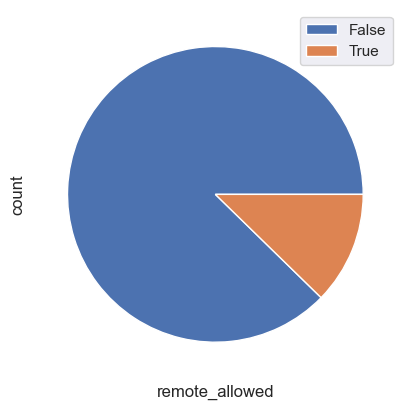

In [129]:
df_jobs['remote_allowed'].fillna(0).map({ 0: False, 1: True }).value_counts().plot.pie(legend=True, labels=None)
plt.xlabel('remote_allowed')

## Listing Time in Jobs Data

<Axes: xlabel='listed_time', ylabel='Count'>

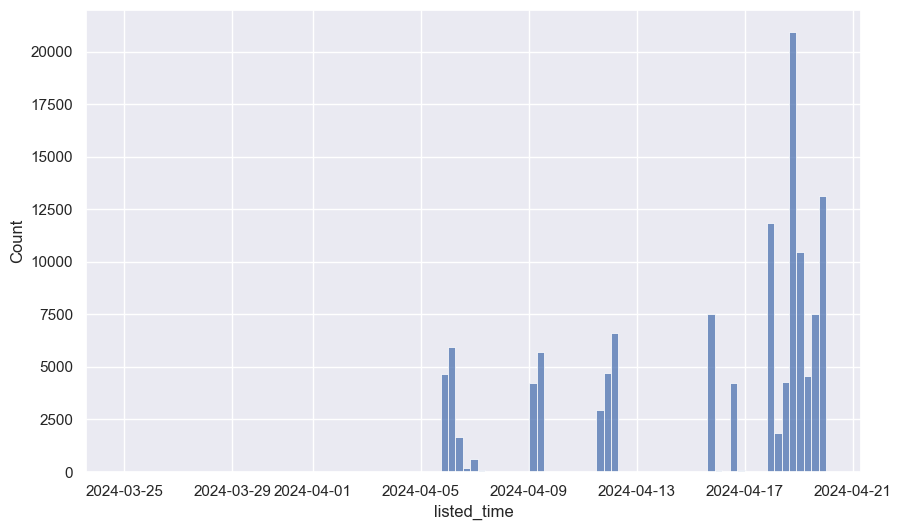

In [130]:
'''
Most of the jobs seem to be listed around the same time (2024-04).
Probably not a useful predictor.
'''
plt.figure(figsize=(10, 6))
sns.histplot(pd.to_datetime(df_jobs['listed_time'], unit='ms'))

## Job Description in Jobs Data

In [131]:
'''
Job descriptions are rich with a lot of useful descriptors for salary prediction like:
1. Job responsibilities
2. Education requirements
3. Certification requirements
4. Skill requirements
5. Work schedule 
6. Benefits

And these descriptors are not in the structured form (like work type, experience level)

However, job descriptions can also contain salary data. 
We NEED to remove any salary data and company names from job descriptions to avoid data leakage - 
  we're supposed to predict them, independently of company names.
'''
jobs = df_jobs.sample(3, random_state=42)
display(jobs)
for i, job in jobs.iterrows():
    print(f'\033[1;4;34mJob {i}\033[0m')
    print()
    print(job['description'])
    print()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
73989,3902944011,Current Power,Senior Automation Engineer - Power Systems,The Senior Automation / Power Systems Engineer...,NaN,NaN,"Houston, TX",760913.0,NaN,NaN,...,NaN,NaN,77002.0,Current Power is an International supplier of ...,TX,US,Houston,77066,Oil and Gas,29.0
59308,3901960222,DISH Network,DISH Installation Technician - Field,"Company Summary\n\nDISH, an EchoStar Company, ...",19.75,HOURLY,"Orange, TX",4296.0,NaN,19.75,...,BASE_SALARY,41080.0,77630.0,Our adventure began by changing the way people...,CO,US,Englewood,80112,Telecommunications,22988.0
44663,3900944095,"Coca-Cola Bottling Company UNITED, Inc.",Order Builder,Division: North Alabama\n\nDepartment : Oxford...,NaN,NaN,"Oxford, AL",136791.0,NaN,NaN,...,NaN,NaN,36203.0,Coca-Cola Bottling Company UNITED was founded ...,AL - Alabama,US,Birmingham,35217,Manufacturing,5672.0


Job 73989

The Senior Automation / Power Systems Engineer will primarily be responsible for the conception, design, development, and implementation of electrical systems. The candidate should have extensive knowledge of electrical power systems, AC drive technology, Active Front End (AFE) systems, and some PLC programming experience. The candidate should also possess the ability to apply mathematical and engineering principles.
Detailed Description:Responsible for designing and developing electrical systems including: generator controls, switchboards, AC or DC drives, Active Front Ends (AFE), motor control systems, panel boards and other components required for a functioning system according to customer specification.Responsible for power system simulations, analysis, and engineering of complex power systems (both microgrid and large utility)Experience analyzing harmonics and corrective measures for complex power systemsExperience specifying, designing, and implementing Active Front En

## Skill Description in Jobs Data

In [132]:
'''
Only 2% of jobs have skill data.
Some skills descriptions don't look right. Though relevant for our problem statement, may not be able to rely on it.
'''
counts = df_jobs['skills_desc'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
skills_desc,,
NaN,121410,98.030666
"This position requires the following skills: Elder care, Healthcare, Hospice Care, Patient Care",28,0.022608
"This position requires the following skills: Advocacy, Community Outreach, CSR / Volunteer Coordination, Fundraising, Lobbying, Public Relations",19,0.015341
"Optometry, Contact Lenses, Glaucoma, Ocular Disease, Eye Exams, Cataract, Low Vision, Diabetes, Eyewear",19,0.015341
"This position requires the following skills: Animal Care / Handling, Animal Therapy, Elder care, Healthcare, Hospice Care, Patient Care",14,0.011304
...,...,...
\n\n\n\nPI9efbd251f855-29463-33823125,1,0.000807
\n\n\n\nPI46a6bbd4459f-29463-34234618,1,0.000807
\n\n\n\nPI78146b7d66fb-29463-34109803,1,0.000807


In [133]:
jobs = df_jobs[df_jobs['skills_desc'].notna()].sample(8, random_state=42)
display(jobs)
for i, job in jobs.iterrows():
    print(f'\033[1;4;34mJob {i}\033[0m')
    print(job['skills_desc'])
    print()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
34570,3895493251,"Peckham Industries, Inc.",Laborer Construction (Req #: 770),Peckham Industries\n\n\nLocation: North Kingst...,NaN,NaN,"North Kingstown, RI",1242877.0,NaN,NaN,...,NaN,NaN,2852.0,"For 100 years, Peckham Industries has remained...",New York,US,Brewster,10509,Construction,306.0
34548,3895492252,CRMG,Storage Facility Assistant Manager,Description:Commercial and Residential Managem...,NaN,NaN,"Salem, OR",3165591.0,NaN,NaN,...,NaN,NaN,97301.0,"In 2021, and after a decades long relationship...",Oregon,US,Portland,97225,Real Estate,155.0
36706,3895594807,"Community Services Project, Inc.",Housekeeping-Janitorial Position $12/hr at Woo...,"Description:CSP, Inc. is looking for a new tea...",NaN,HOURLY,"Kentucky, United States",20571175.0,12.0,NaN,...,BASE_SALARY,24960.0,NaN,Community Services Project (CSP) is a 501(c)(3...,KY,US,LOUISVILLE,40272,Staffing and Recruiting,14.0
84127,3904097293,Collabera,Data Compliance Analyst,Job Details: \nTitle: Data Compliance Analyst\...,NaN,NaN,"Charlotte, NC",24440.0,NaN,NaN,...,NaN,NaN,28202.0,"In our relentless pursuit of greatness, we're ...",New Jersey,US,Basking Ridge,07920,IT Services and IT Consulting,6335.0
34741,3895513671,CareerStaff Unlimited,Registered Nurse - RN - LTAC,Registered Nurse - RN - LTAC\nCareerStaff Unli...,NaN,NaN,"St Charles, MO",3706049.0,NaN,NaN,...,NaN,NaN,63301.0,Our team of healthcare experts can help you me...,Texas,US,Irving,75038,Staffing and Recruiting,956.0
51776,3901392395,CBRE,"Senior Project Manager- FF&E (Furniture, Fixtu...",About the role \n\n The purpose of this positi...,NaN,NaN,"Indianapolis, IN",2319.0,NaN,NaN,...,NaN,NaN,46201.0,Operating across every dimension of commercial...,TX,US,Dallas,75201,Real Estate,70973.0
89411,3904411403,CareerStaff Unlimited,Registered Nurse - RN - Intensive Care Unit - ICU,Registered Nurse - RN - Intensive Care Unit - ...,NaN,NaN,"Devils Lake, ND",3706049.0,NaN,NaN,...,NaN,NaN,58301.0,Our team of healthcare experts can help you me...,Texas,US,Irving,75038,Staffing and Recruiting,956.0
34941,3895520021,CareerStaff Unlimited,Registered Nurse - RN - Cardiac Cath,Registered Nurse - RN - Cardiac Cath\nCareerSt...,NaN,NaN,"York, ME",3706049.0,NaN,NaN,...,NaN,NaN,3909.0,Our team of healthcare experts can help you me...,Texas,US,Irving,75038,Staffing and Recruiting,956.0


Job 34570




PI501c5d48e158-29463-33769494

Job 34548




PI535495793c38-29462-34210853

Job 36706




PI50727267ba6f-29463-34207085

Job 84127
Data Governance

Job 34741




PIc7a5278565e0-29463-34235491

Job 51776
What you’ll need 

 To perform this job successfully, an individual must be able to perform each essential duty satisfactorily. The requirements listed below are representative of the knowledge, skill, and/or ability required.

 Bachelor's degree (BA/BS/BEng/BArch) from College or University in a technical area of study. Less than 5 years prior experience in a Project Management related field/area required. 

 PMP (US and/or Canada) and LEED AP preferred.

 Why CBRE? 

 We value a culture of respect, integrity, service and excellence crafts our approach to every opportunity! We are guided by the needs of the cities we inhabit, the communities we build, and the world we thrive in.

 Competitive pay and benefits including Medical, Dental, Vision, PTO, 401k, and more that sta

In [134]:
job = df_jobs.iloc[84127]
print(job['description'])

Job Details: 
Title: Data Compliance Analyst
Location: Charlotte, NC
Duration: 12 months of contract | Onsite 
Pay: $60/Hr. to $63/Hr. 
Job Description: 


Ensuring quality assurance reviews are well designed, adequately prepared for, and executed flawlessly


Ensuring scripts are well constructed to focus on quality, sampling methodologies are sound and well documented, communication with


stakeholders is clear and effective, and reporting is complete and accurate


Ensuring supporting documentation (procedures, etc.) is up to date, complete, and Audit-ready


Assess QA Execution Results for lessons learned and thematic analysis and present findings in a consumable way


Collaborate with contractors, Global Business Services (GBS) teams, and resources to ensure test cases are completed, issues are escalated as needed, and overall successful execution of QA


In [135]:
'''
It seems like skills description could be an "extension" of job description.
'''
job = df_jobs.iloc[51776]
print(job['description'])

About the role 

 The purpose of this position is to coordinate individual, project solutions for a pharmaceutical client, with direct accountability for project delivery. This position will primarily focus on the delivery of FF&E (Furniture, Fixtures, and Equipment) aspects contained within a larger project; except in instances where the project only consists of FF&E scope. 

 What you’ll do 

 Manages all facets of project management (Pre-project safety and risk analysis, budget, schedule, procurement, quality & risk) for individual projects located in various Indianapolis campus areas. 

 Demonstrates capability to read, understand, and apply standard to complex documents affecting projects, including but not limited to: agreements/contracts, work letters, project charters, surveys and drawings. 

 Interfaces directly with clients to define project requirements. Prepares scope of work, project delivery resource requirements, cost estimate & budget, cash flow, work plan schedule & mi

## Company Industries in Jobs Data

In [136]:
counts = df_jobs['company_industries'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
company_industries,,
Staffing and Recruiting,18836,15.208843
Hospitals and Health Care,15731,12.701758
IT Services and IT Consulting,11504,9.288731
Retail,9609,7.758642
Software Development,5715,4.614490
...,...,...
Warehousing and Storage,2,0.001615
Wireless Services,1,0.000807
Mobile Gaming Apps,1,0.000807


## Company Employee Count in Jobs Data

<Axes: xlabel='company_employee_count', ylabel='Count'>

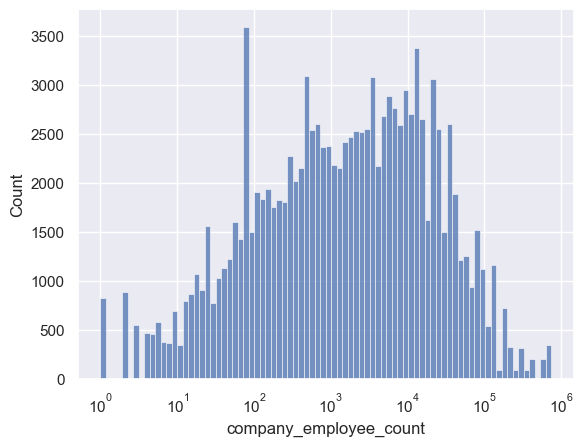

In [137]:
sns.histplot(df_jobs['company_employee_count'], log_scale=True)

## Company Description in Jobs Data

In [138]:
'''
Comapny descriptions may be useful to predict salaries.
We should treat it as job descriptions - remove any salary data and company names to avoid data leakage.
'''
jobs = df_jobs.sample(3, random_state=42)
display(jobs)
for i, job in jobs.iterrows():
    print(f'\033[1;4;34mJob {i}\033[0m')
    print()
    print(job['company_description'])
    print()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
73989,3902944011,Current Power,Senior Automation Engineer - Power Systems,The Senior Automation / Power Systems Engineer...,NaN,NaN,"Houston, TX",760913.0,NaN,NaN,...,NaN,NaN,77002.0,Current Power is an International supplier of ...,TX,US,Houston,77066,Oil and Gas,29.0
59308,3901960222,DISH Network,DISH Installation Technician - Field,"Company Summary\n\nDISH, an EchoStar Company, ...",19.75,HOURLY,"Orange, TX",4296.0,NaN,19.75,...,BASE_SALARY,41080.0,77630.0,Our adventure began by changing the way people...,CO,US,Englewood,80112,Telecommunications,22988.0
44663,3900944095,"Coca-Cola Bottling Company UNITED, Inc.",Order Builder,Division: North Alabama\n\nDepartment : Oxford...,NaN,NaN,"Oxford, AL",136791.0,NaN,NaN,...,NaN,NaN,36203.0,Coca-Cola Bottling Company UNITED was founded ...,AL - Alabama,US,Birmingham,35217,Manufacturing,5672.0


Job 73989

Current Power is an International supplier of high power electrical equipment and automation for the downstream, midstream, upstream, energy, marine, and mining industries.  These industries all have demanding requirements for reliability and safety.  We specialize in supplying high power variable frequency drives, switchgear, packaged electrical buildings, and PLC automation that is uniquely suited for the application and environment. 

OUR PRODUCTS AND SERVICES
- Low voltage variable frequency drives
- Medium voltage variable frequency drives
- Switchgear and power distribution systems
- PLC automated controls
- Generator control systems
- Packaged electrical buildings
- Load flow, harmonic analysis, coordination, and short circuit studies
- Field engineering, commissioning, and emergency service


Job 59308

Our adventure began by changing the way people watched TV, bringing DISH to where big cable wouldn’t: rural America. Since then, we have reinvented ourselves and our 

## Normalized Salary in Jobs Data

**What is "normalized_salary"**

Explanation at https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/discussion/546457:

"Salaries are provided either hourly, bi-weekly, monthly, or yearly. They also either contain a range (low-high), or a singular "median" value.

normalized_salary is a crude method to convert all of them to the same scale, by taking the average of low and high, and converting everything to an annual salary by multiplying by the number of weeks/months in a year"

In [139]:
salaries = df_jobs['normalized_salary']

<Axes: ylabel='normalized_salary'>

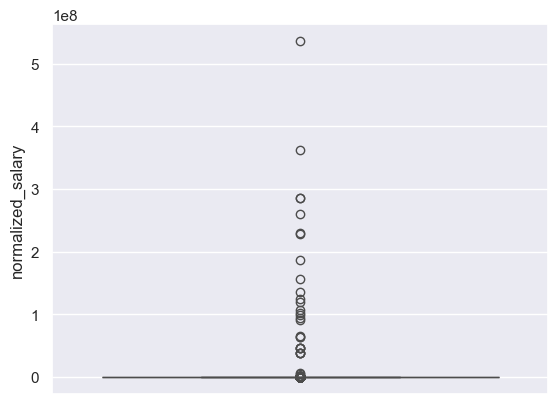

In [140]:
'''
Looks like a lot of right-tail outliers based on a boxplot of normalized salary.
'''
sns.boxplot(salaries)

<Axes: ylabel='normalized_salary'>

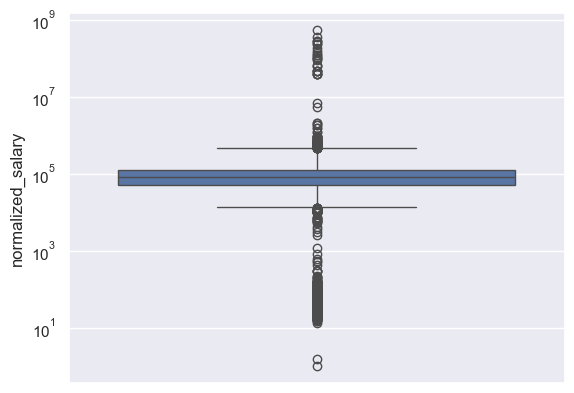

In [141]:
'''
Based on a boxplot of log normalized salary...

Salaries below 10K USD yearly is below minimum wage in US. See https://www.dol.gov/agencies/whd/minimum-wage.
We should remove them as they are definitely bad data.
'''
sns.boxplot(salaries, log_scale=True)

In [142]:
'''
Look at right tail salary outliers and figure out whether they are bad data or not.
'''
stats = salaries.describe(percentiles=[0.95, 0.99, 0.995, 0.999])
print('Num jobs above P99.9:', (salaries > stats['99.9%']).sum())
print('Num jobs above P99.5:', (salaries > stats['99.5%']).sum())
print('Num jobs above P99:', (salaries > stats['99%']).sum())
print('Num jobs above P95:', (salaries > stats['95%']).sum())
stats

Num jobs above P99.9: 37
Num jobs above P99.5: 181
Num jobs above P99: 361
Num jobs above P95: 1750


count    3.607300e+04
mean     2.053270e+05
std      5.097627e+06
min      0.000000e+00
50%      8.150000e+04
95%      2.000000e+05
99%      3.008080e+05
99.5%    3.944600e+05
99.9%    1.244544e+06
max      5.356000e+08
Name: normalized_salary, dtype: float64

In [143]:
'''
P99.9 jobs look like bad data - most of them are hourly lower paid jobs.
'''
df_jobs[salaries >= stats['99.9%']].sample(10, random_state=42)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
88153,3904392687,TriMark USA,Accounts Payable Administrator,TriMark USA is the country’s largest provider ...,54000.0,HOURLY,"Irvine, CA",150203.0,NaN,36000.0,...,BASE_SALARY,93600000.0,92602.0,TriMark USA is one of the country’s largest fu...,Massachusetts,US,Mansfield,02048,Wholesale,2177.0
79620,3903829232,RedBalloon,Ark Encounter Housekeeping Specialist Full Tim...,Receives direction and responsibilities from t...,32240.0,HOURLY,"Williamstown, KY",74746043.0,NaN,29120.0,...,BASE_SALARY,63814400.0,41097.0,"America's #1 non-woke job board, connecting se...",ID,US,Moscow,0,Staffing and Recruiting,49.0
19869,3889117757,The Hillman Group,Full Time Field Service Technician – Wilmingto...,Full Time Field Service Technician – Wilmingt...,50000.0,HOURLY,"Wilmington, NC",56960.0,NaN,45000.0,...,BASE_SALARY,98800000.0,28401.0,"Welcome to Hillman, \n\nFounded in 1964 and he...",Ohio,US,Cincinnati,45240,Manufacturing,1586.0
98809,3904988195,Kaiser Permanente,Summer Intern,Job Summary\n\nNo information available at thi...,21593.0,HOURLY,"Riverside, CA",1550.0,NaN,15600.0,...,BASE_SALARY,38680720.0,92501.0,We are relentless in our pursuit of excellence...,California,US,Oakland,94612,Hospitals and Health Care,124612.0
107469,3905333190,Sherwin-Williams,"Store Sales Representative - Cleveland, OH",Job Description\n\nThis position is required t...,66976.0,BIWEEKLY,"Cleveland, OH",165944.0,NaN,54009.0,...,BASE_SALARY,1572805.0,44102.0,Our mission began more than 150 years ago in 1...,OH,US,Cleveland,44101,Chemical Manufacturing,43925.0
98527,3904983825,Kaiser Permanente,Student Nurse (Intern),Job Summary\n\nStudent Nurses (Interns) in the...,25396.8,HOURLY,"Ontario, CA",1550.0,NaN,19968.0,...,BASE_SALARY,47179392.0,91758.0,We are relentless in our pursuit of excellence...,California,US,Oakland,94612,Hospitals and Health Care,124612.0
40101,3898171094,Koantek,Data Engineer,BI/DW Engineer/Analyst to help the ERP team mo...,6570.0,HOURLY,United States,78632700.0,NaN,65.0,...,BASE_SALARY,6900400.0,NaN,We work with you to understand your current te...,Arizona,US,Chandler,85224,IT Services and IT Consulting,197.0
98551,3904984601,Kaiser Permanente,Student Nurse (Intern),Job Summary\n\nStudent Nurses (Interns) in the...,25396.8,HOURLY,"Ontario, CA",1550.0,NaN,19968.0,...,BASE_SALARY,47179392.0,91758.0,We are relentless in our pursuit of excellence...,California,US,Oakland,94612,Hospitals and Health Care,124612.0
98508,3904982892,Kaiser Permanente,Summer Intern,Job Summary\n\nNo information available at thi...,21593.0,HOURLY,"Riverside, CA",1550.0,NaN,15600.0,...,BASE_SALARY,38680720.0,92501.0,We are relentless in our pursuit of excellence...,California,US,Oakland,94612,Hospitals and Health Care,124612.0
87241,3904388630,The Hillman Group,Full Time Field Service Technician – Anaheim/P...,Full Time Field Service Technician – Anaheim...,68000.0,HOURLY,"Anaheim, CA",56960.0,NaN,62000.0,...,BASE_SALARY,135200000.0,92801.0,"Welcome to Hillman, \n\nFounded in 1964 and he...",Ohio,US,Cincinnati,45240,Manufacturing,1586.0


In [144]:
'''
P99.5 jobs look fair.
'''
df_jobs[(salaries >= stats['99.5%']) & (salaries < stats['99.9%'])].sample(10, random_state=42)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
102115,3905259087,Slack,"Chief Product Officer, Slack","To get the best candidate experience, please c...",524000.0,YEARLY,"San Francisco, CA",1612748.0,NaN,474000.0,...,BASE_SALARY,499000.0,94101.0,Slack is on a mission to make people's working...,California,US,San Francisco,0,Software Development,3465.0
14511,3887872935,Netflix,Technical Program Manager 6 - Game SDK and Ser...,Netflix is one of the world's leading entertai...,725000.0,YEARLY,United States,165158.0,NaN,240000.0,...,BASE_SALARY,482500.0,NaN,Netflix is one of the world's leading entertai...,CA,US,Los Gatos,0,Entertainment Providers,15605.0
76156,3903467710,SAP,SAP NS2 Cloud Infrastructure Intern- Virtual,We help the world run better\n\nOur company cu...,NaN,YEARLY,"Herndon, VA",1115.0,400000.0,NaN,...,BASE_SALARY,400000.0,20170.0,"At SAP, our purpose is to help the world run b...",BW,DE,Walldorf,69190,Software Development,114602.0
90886,3904429746,Bread Financial,Chief Information Security Officer (CISO),Every career journey is personal. That's why w...,943400.0,YEARLY,"Columbus, OH",84108929.0,NaN,320200.0,...,BASE_SALARY,631800.0,43085.0,"Bread Financial provides simple, personalized ...",Ohio,US,Columbus,43219,Financial Services,3482.0
46482,3900966318,Confidential,Asylum: Evidence Gathering Attorney,"Pay Rate:\n$200 per hour\nLocation:\nRemote, h...",NaN,HOURLY,United States,33242739.0,200.0,NaN,...,BASE_SALARY,416000.0,NaN,We help organizations grow! We do this confide...,NY,US,Greater New York City,10007,IT Services and IT Consulting,34892.0
8477,3886213590,Jobot,Senior Blockchain Engineer (Rust & Solana) - 1...,Want to learn more about this role and Jobot? ...,800000.0,YEARLY,"Chicago, Illinois, United States",18860134.0,NaN,150000.0,...,BASE_SALARY,475000.0,NaN,Jobot is built on kindness + respect. We are d...,California,US,Newport Beach,92663,Staffing and Recruiting,3643.0
115360,3905849005,Radley James,Python Developer,**Offering up to $650K and a comprehensive rel...,750000.0,YEARLY,"Chicago, IL",1116353.0,NaN,750000.0,...,BASE_SALARY,750000.0,60601.0,Radley James connects skilled professionals wi...,London,GB,London,EC3A 3DE,Staffing and Recruiting,33.0
53953,3901670861,Maimonides Medical Center,SVP Physician Operations – Medical Affairs Adm...,SVP Physician Operations – Medical Affairs Adm...,425000.0,YEARLY,"Brooklyn, NY",164821.0,NaN,375000.0,...,BASE_SALARY,400000.0,11201.0,Brooklyn's Leading Hospital.\n \nMaimonides Me...,NY,US,Brooklyn,11219,Hospitals and Health Care,4530.0
54411,3901677447,Emburse,Senior Sales Account Executive - Enterprise,At Emburse our mission is to help make our use...,NaN,YEARLY,United States,11008286.0,750000.0,NaN,...,BASE_SALARY,750000.0,NaN,Emburse makes expense management simple. Our e...,Maine,US,Portland,04101,Software Development,930.0
13766,3887840140,CareerStaff Unlimited,Registered Nurse - RN - Skilled Nursing Facility,Registered Nurse - RN - Skilled Nursing Facili...,831891.0,YEARLY,"Montgomeryville, PA",3706049.0,NaN,13824.0,...,BASE_SALARY,422857.5,18936.0,Our team of healthcare experts can help you me...,Texas,US,Irving,75038,Staffing and Recruiting,956.0


Num jobs below min salary of 10K: 417
Num jobs above 1M: 38


<Axes: ylabel='normalized_salary'>

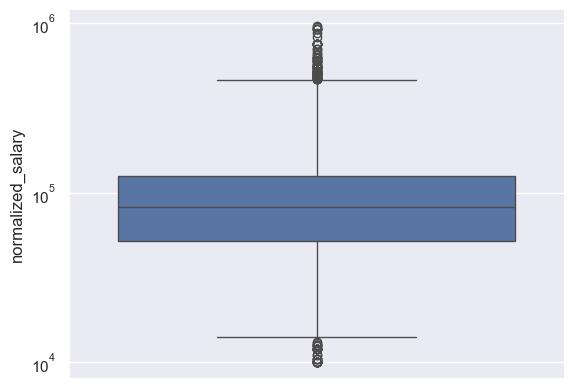

In [145]:
'''
Let's say we only look at jobs above 10K (min wage) and below 1M (~P99.9).
What does the distribution look like?
'''
MIN_SALARY = 10000
MAX_SALARY = 1e6
print('Num jobs below min salary of 10K:', (salaries < MIN_SALARY).sum())
print('Num jobs above 1M:', (salaries > MAX_SALARY).sum())
sns.boxplot(salaries[(salaries >= MIN_SALARY) & (salaries <= MAX_SALARY)], log_scale=True)

<Axes: xlabel='normalized_salary', ylabel='Count'>

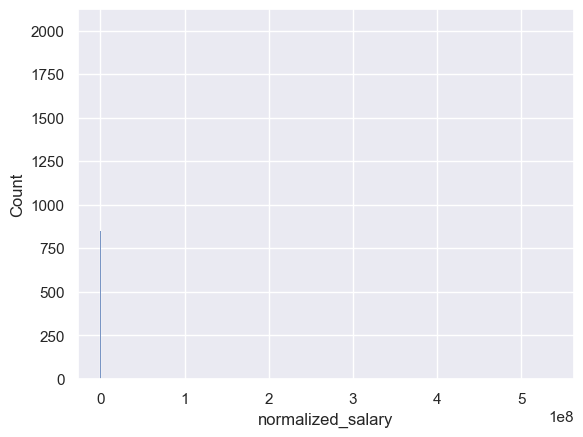

In [146]:
sns.histplot(salaries)

<Axes: xlabel='normalized_salary', ylabel='Count'>

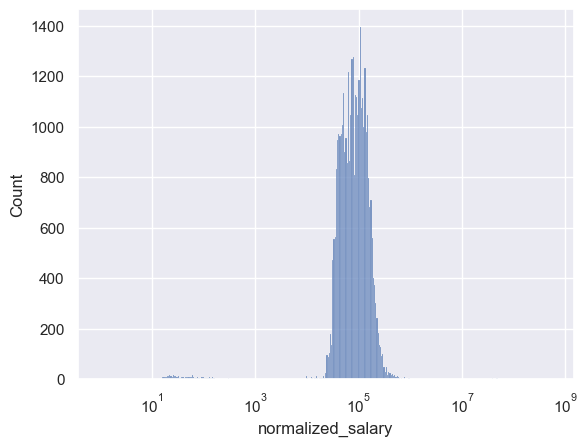

In [147]:
sns.histplot(salaries, log_scale=True)

,count,%
None,87776,70.873402
MIN_MAX,29793,24.055907
MED,6280,5.070691


Text(0.5, 0, 'normalized_salary_source')

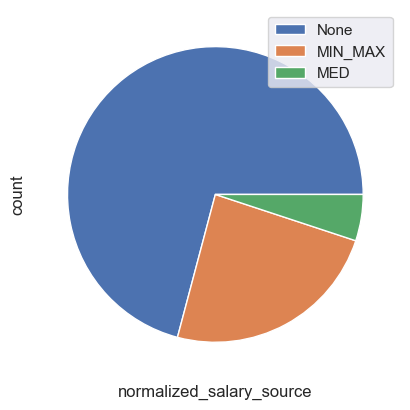

In [148]:
'''
We don't have normalized salaries for ~70.9% of the jobs.
~24.1% of jobs have normalized salaries based on a given min-max range.
~5.07% of jobs have normalized salaries based on a given median.
'''
has_min_max = df_jobs['min_salary'].notna() & df_jobs['max_salary'].notna()
has_med = df_jobs['med_salary'].notna()
normalized_salary_source = pd.Series(np.select([has_min_max, has_med], ['MIN_MAX', 'MED'], default=None))

counts = normalized_salary_source.value_counts(dropna=False)
display(pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1))

counts.plot.pie(legend=True, labels=None)
plt.xlabel('normalized_salary_source')

## Salary Range in Jobs Data

<Axes: ylabel='Count'>

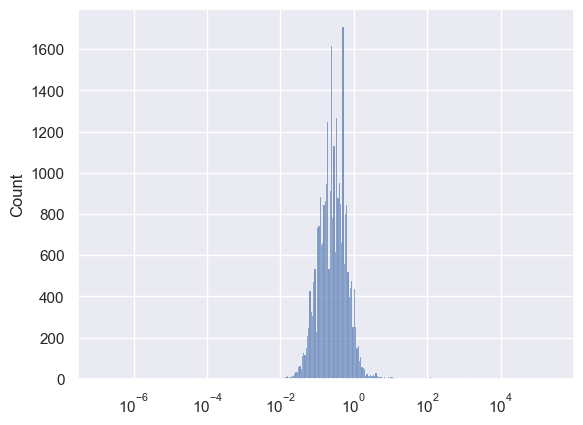

In [149]:
'''
The larger the salary range spread, the more likely the job's normalized salary is inaccurate due to the spread.
'''
salary_range_spreads = (df_jobs['max_salary'] - df_jobs['min_salary'])/df_jobs['min_salary']
sns.histplot(salary_range_spreads, log_scale=True)

In [150]:
stats = salary_range_spreads.describe(percentiles=[0.95, 0.99, 0.995, 0.999])
print('Num jobs above P99.9:', (salary_range_spreads > stats['99.9%']).sum())
print('Num jobs above P99.5:', (salary_range_spreads > stats['99.5%']).sum())
print('Num jobs above P99:', (salary_range_spreads > stats['99%']).sum())
print('Num jobs above P95:', (salary_range_spreads > stats['95%']).sum())
stats

Num jobs above P99.9: 28
Num jobs above P99.5: 149
Num jobs above P99: 295
Num jobs above P95: 1387


count     29793.000000
mean         39.962875
std        2252.611194
min           0.000000
50%           0.251583
95%           1.000000
99%           2.214286
99.5%         4.319716
99.9%       119.000000
max      239999.000000
dtype: float64

In [151]:
'''
P99.5 jobs look like bad data due to very low min salaries, especially when sanity-checking them with Indeed Salaries e.g. https://www.indeed.com/career/account-manager/salaries?from=top_sb.
'''
df_jobs[salary_range_spreads >= stats['99.5%']].sample(10, random_state=42)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
57280,3901943134,Workling,Work From Home Sales Associate,Location: Remote WFH All Latin American Candid...,600000.0,YEARLY,"Phoenix, AZ",53237848.0,NaN,5000.0,...,BASE_SALARY,302500.0,85003.0,"At Workling, we believe that instant impact ha...",California,US,Mountain View,94040,Software Development,107.0
8477,3886213590,Jobot,Senior Blockchain Engineer (Rust & Solana) - 1...,Want to learn more about this role and Jobot? ...,800000.0,YEARLY,"Chicago, Illinois, United States",18860134.0,NaN,150000.0,...,BASE_SALARY,475000.0,NaN,Jobot is built on kindness + respect. We are d...,California,US,Newport Beach,92663,Staffing and Recruiting,3643.0
100627,3905219453,INDI Staffing Services,Work From Home Account Director,Recognized as the leading software development...,600000.0,YEARLY,"Austin, TX",77264419.0,NaN,5000.0,...,BASE_SALARY,302500.0,78701.0,"At INDI, we believe that people and businesses...",0,0,0,0,Staffing and Recruiting,3.0
60736,3901982197,Almond & Associates,Administrative Assistant,The ideal candidate will exhibit high standard...,65000.0,YEARLY,"Enumclaw, WA",15093123.0,NaN,55.0,...,BASE_SALARY,32527.5,98022.0,Whether you are an employer or someone looking...,Washington,US,Tacoma,98402,Staffing and Recruiting,25.0
60227,3901977375,Insurance Elevated,Life Insurance Sales,Company DescriptionHere at Insurance Elevated ...,600000.0,YEARLY,"Phoenix metropolitan area, AZ",101803110.0,NaN,80000.0,...,BASE_SALARY,340000.0,85003.0,"Welcome to Insurance Elevated, where we redefi...",Florida,US,Tampa,33605,Insurance,37.0
21649,3889449196,Goodwin Recruiting,Restaurant Sous Chef,To Apply for this Job Click Here\n\nJob Descri...,65000.0,YEARLY,"Charleston, SC",74985.0,NaN,12000.0,...,BASE_SALARY,38500.0,29401.0,Goodwin Recruiting (Forbes America's Best Recr...,New Hampshire,US,Exeter,03833,Staffing and Recruiting,400.0
51196,3901379544,Millennium Health,Account Manager,*This is a field-based position traveling thro...,60000.0,YEARLY,"Pensacola, FL",835663.0,NaN,5000.0,...,BASE_SALARY,32500.0,32501.0,Millennium Health is an accredited specialty l...,CA,US,San Diego,92127,Hospitals and Health Care,638.0
117641,3906071626,Theoria Medical,Medical Director,"Position Type: Part-time, exempt\n\nCompensati...",400000.0,YEARLY,"Grovetown, GA",51664810.0,NaN,50000.0,...,BASE_SALARY,225000.0,30813.0,Theoria Medical is a pioneering healthcare and...,Michigan,US,Novi,48375,Hospitals and Health Care,344.0
52677,3901617560,Beacon Hill Staffing Group,Contract Analyst/Corporate Paralegal,"\nBeacon Hill Legal is seeking a full-time, de...",850000.0,YEARLY,"Wheeling, IL",22456.0,NaN,70000.0,...,BASE_SALARY,460000.0,60090.0,Beacon Hill Staffing Group was founded to set ...,MA,US,Boston,02108,Staffing and Recruiting,2831.0
68362,3902762003,GetInsured,Revenue Accountant,About GetInsured:What started as the “Expedia”...,115000.0,YEARLY,"Mountain View, CA",286115.0,NaN,85.0,...,BASE_SALARY,57542.5,94040.0,We are a company on a mission to do good throu...,CA,US,Mountain View,94043,Insurance,354.0


In [152]:
'''
P99 jobs look more reasonable.
'''
df_jobs[(salary_range_spreads >= stats['99%']) & (salary_range_spreads < stats['99.5%'])].sample(10, random_state=42)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,...,compensation_type,normalized_salary,zip_code,company_description,company_state,company_country,company_city,company_zip_code,company_industries,company_employee_count
50063,3901367093,Walmart,Hourly Supervisor & Training,Are you looking for a job that offers more res...,45.0,HOURLY,"Altamonte Springs, FL",2646.0,NaN,14.00,...,BASE_SALARY,61360.0,32701.0,"Sixty years ago, Sam Walton started a single m...",Arkansas,US,Bentonville,72712,Retail,428738.0
11048,3887475434,Huxley,Principal Software Engineer (Python),Top firm in Boston is hiring for a Principal S...,400000.0,YEARLY,"Boston, MA",7355.0,NaN,100000.00,...,BASE_SALARY,250000.0,2108.0,Huxley delivers world-class recruitment servic...,England,GB,London,EC2V 5DX,Staffing and Recruiting,758.0
90911,3904430446,AT&T,Specialist Sales Executive Mobility,Job Description:\n\nAs a Sales Executive Mobil...,109200.0,YEARLY,"San Francisco, CA",1052.0,NaN,30000.00,...,BASE_SALARY,69600.0,94101.0,We understand that our customers want an easie...,TX,US,Dallas,75202,Telecommunications,174080.0
55458,3901902023,Lord Gurman & Lewis,Matrimonial Associate,"We have been exclusively retained by an elite,...",130000.0,YEARLY,"New York, NY",1495958.0,NaN,25000.00,...,BASE_SALARY,77500.0,10001.0,Lord Gurman & Lewis is an attorney placement f...,0,0,0,0,Staffing and Recruiting,3.0
54122,3901673301,Kaplan,"MCAT Prep Instructor - University of Colorado,...",Job Title \n\nMCAT Prep Instructor - Universit...,50.0,HOURLY,"Boulder, CO",3342.0,NaN,15.00,...,BASE_SALARY,67600.0,80301.0,Kaplan is a global educational services compan...,FL,US,Fort Lauderdale,33309,Education Administration Programs,10930.0
17731,3888417746,National Security Agency,Mission Assurance Continuity Specialist - Entr...,"Responsibilities\n\n Manage, plan, exercise, a...",181216.0,YEARLY,"Fort Meade, MD",1359.0,NaN,55924.00,...,BASE_SALARY,118570.0,20755.0,There is a Place for You at NSA \nWhatever exp...,MD,US,Ft. Meade,20755,Defense and Space Manufacturing,3627.0
46506,3900967014,Navigate Power,Energy Solutions Consultant,Department: Sales\n\nEmployment Type: Contract...,250000.0,YEARLY,"Philadelphia, PA",2810305.0,NaN,50000.00,...,BASE_SALARY,150000.0,19102.0,Register Your Interest: https://navigatepower....,IL,US,Chicago,60614,Oil and Gas,90.0
116961,3905876791,Goodwin Recruiting,Hospitality Recruiting Partner,Want to love what you do with unlimited earnin...,250000.0,YEARLY,"Denver, CO",74985.0,NaN,75000.00,...,BASE_SALARY,162500.0,80202.0,Goodwin Recruiting (Forbes America's Best Recr...,New Hampshire,US,Exeter,03833,Staffing and Recruiting,400.0
47205,3900983354,National General,Inside Licensed Sales Agent,Job Description\n\nNational General Insurance ...,100000.0,YEARLY,United States,7720.0,NaN,18800.00,...,BASE_SALARY,59400.0,NaN,"As part of the Allstate family of companies, N...",NY,US,New York,10038,Insurance,5778.0
57213,3901942829,Ingersoll Rand,CNC Machinist I - 1st Shift,"1st shift : 630a-3p, Mon-Fri, OT and weekends ...",90.0,HOURLY,"Southern Pines, NC",3175.0,NaN,22.03,...,BASE_SALARY,116511.2,28387.0,"Ingersoll Rand (NYSE:IR), driven by an entrepr...",North Carolina,US,Davidson,28036,Industrial Machinery Manufacturing,14038.0


## Pay Period in Jobs Data

In [153]:
counts = df_jobs['pay_period'].value_counts(dropna=False)
pd.concat([counts, counts/len(df_jobs)*100], keys=['count', '%'], axis=1)

,count,%
pay_period,,
NaN,87776,70.873402
YEARLY,20628,16.655766
HOURLY,14741,11.902397
MONTHLY,518,0.418251
WEEKLY,177,0.142916
BIWEEKLY,9,0.007267


## Other Columns in Jobs Data

In [154]:
'''
The "sponsored" column is all 0 despite 100% coverage. 
Either bad data or only unsponsored jobs are scraped - not useful for our problem.
'''
df_jobs['sponsored'].value_counts()

sponsored
0    123849
Name: count, dtype: int64

In [155]:
'''
The "compensation_type" column is either "BASE_SALARY" or null. 
Not useful for our problem.
'''
df_jobs['compensation_type'].value_counts()

compensation_type
BASE_SALARY    36073
Name: count, dtype: int64

In [156]:
'''
There are a very few non-USD jobs.
We should remove them. Only predict jobs in USD.
'''
df_jobs['currency'].value_counts()

currency
USD    36058
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64